# Welcome to Trio de Informática's Second IART Project about Topic Modelling using NLP

Throughout this notebook one can observe the step by step data analysis of the training datasets as well as different approaches to this challenge. Several algorithms will also be implemented such as Naive Bayes, decision trees, SVM, etc. Be aware that different data processing techniques can match different algorithms, so in order to test all the combinations several cells will be provided to present all the results, as well as a comparison of accuracy of each implemented technique. 

The following notebook will record the group's approach to the proposed project, starting with the data analysis, followed by the data preprocessing. Afterwards, various algorithms will be implemented and a result comparison between different approaches will be performed.

# Statistical analysis

As one can observe when executing the code below, the provided dataset is composed of a table with several columns referring to different informations. Every entry in this dataset is identified by an ID, generated incrementally. Each entry contains a Title and an Abstract, reffering to a report/article to be classified as belonging to some topic. Each entry has an additional 6 columns related to topic classification. Each of these columns reffers to a topic: Computer Science, Physics, Mathematics, Statistics, Quantitative Biology and Quantitative Finance, and will contain a 1 if the article belongs to that said topic and a 0 otherwise.

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Importing the dataset
train = pd.read_csv('archive/train_smaller.csv')

train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


## Size of the training dataset

It is important to know the magnitude of the dataset used to train the predictive model. Therefore, the following block of code will allow us to check the dimention of the used dataset. The bigger the dataset, the more data is taken into account when training the model, thus allowing it to acquire more information.

In [2]:
print("Train: Rows & Columns")
print(train.shape)

Train: Rows & Columns
(4999, 9)


## Training Dataset Info

By showing the info of the training dataset, one can see that there are no null values, meaning that there is no missing data. 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    4999 non-null   int64 
 1   TITLE                 4999 non-null   object
 2   ABSTRACT              4999 non-null   object
 3   Computer Science      4999 non-null   int64 
 4   Physics               4999 non-null   int64 
 5   Mathematics           4999 non-null   int64 
 6   Statistics            4999 non-null   int64 
 7   Quantitative Biology  4999 non-null   int64 
 8   Quantitative Finance  4999 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 351.6+ KB


## Dataset description

Additionally, as shown below, the training dataset seems very clean because:

- Number of rows for all the data columns are same
- The max of all these 0-1 inputs is always 1
- The min and max value of the column ID match the expected values and so do the 25%, 50% and 75%, thus showing that the ID is incremented correctly


In [4]:
train.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,0.416083,0.278256,0.269454,0.259652,0.029206,0.012803
std,1443.231328,0.492957,0.448185,0.443720,0.438487,0.168400,0.112433
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3749.500000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,4999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Topic Distribution

Each entry in the training dataset belongs to a topic. In order to evaluate the topics with the most and least entries, below is presented a numerical analysis where we can find the topic distribution of the training dataset. The model will classify more easily papers related to topics with the most entries in the training dataset, therefore the predictive model will be better trained to identify the more recurring topics of the training dataset.

In [6]:
print('Number of articles that belong the the topic:\n')
print('- Computer Science: ',train['Computer Science'].sum())
print('- Physics: ',train['Physics'].sum())
print('- Mathematics: ',train['Mathematics'].sum())
print('- Statistics: ',train['Statistics'].sum())
print('- Quantitative Biology: ',train['Quantitative Biology'].sum())
print('- Quantitative Finance: ',train['Quantitative Finance'].sum())

print('\nAs a percentage:\n')
print('- Computer Science: ',round(train['Computer Science'].sum()/train.shape[0]*100), '%')
print('- Physics: ',round(train['Physics'].sum()/train.shape[0]*100),'%')
print('- Mathematics: ',round(train['Mathematics'].sum()/train.shape[0]*100),'%')
print('- Statistics: ',round(train['Statistics'].sum()/train.shape[0]*100),'%')
print('- Quantitative Biology: ',round(train['Quantitative Biology'].sum()/train.shape[0]*100),'%')
print('- Quantitative Finance: ',round(train['Quantitative Finance'].sum()/train.shape[0]*100),'%')

Number of articles that belong the the topic:

- Computer Science:  2080
- Physics:  1391
- Mathematics:  1347
- Statistics:  1298
- Quantitative Biology:  146
- Quantitative Finance:  64

As a percentage:

- Computer Science:  42 %
- Physics:  28 %
- Mathematics:  27 %
- Statistics:  26 %
- Quantitative Biology:  3 %
- Quantitative Finance:  1 %


## Variable correlation?

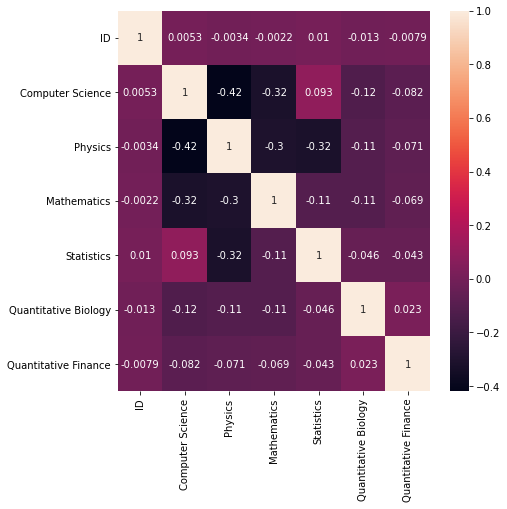

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

corrmat = train.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False, annot=True)
plt.show()

## Evaluation of the length distribution of Titles and Abstracts

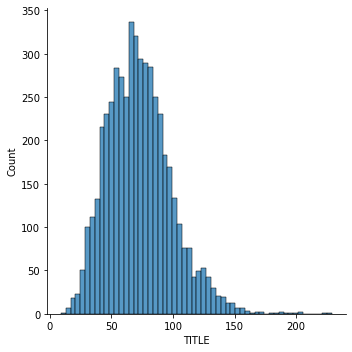

In [8]:
train_title_len = train['TITLE'].apply(len)
sb.displot(train_title_len)

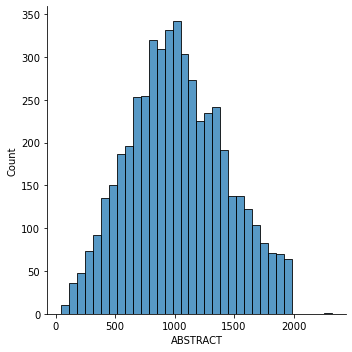

In [9]:
train_abstract_len = train['ABSTRACT'].apply(len)
sb.displot(train_abstract_len)

# Preprocessing Techniques

Be aware that each preprocessing technique applied includes some other steps such as: removing non-alphanumeric characters, lowercasing all words and tokenizing. After applying the preprocesing algorithm, there is an aditional step to remove all stopwords. After all this steps are completed, each preprocessing function returns the corpus, a structure composed of tuples encapsulating each preprocessed title-abstract pair.

## Porter Stemming

The Porter Stemming algorithm being the one of the oldest, originally developed in 1979, uses Suffix Stripping to produce stems. PorterStemmer is known for its simplicity and speed. It is commonly useful in Information Retrieval Environments known as IR Environments for fast recall and fetching of search queries. In a typical IR, environment documents are represented as vectors of words or terms. Words having the same stem will therefore have a similar meaning. 


In [10]:
from nltk.stem.porter import PorterStemmer

def porterStemming():

    corpus=[]
    # Initialize PorterStemmer
    ps = PorterStemmer()

    for i in range(0,train.shape[0]):
        # get title and abstract and remove non alpha chars
        title = re.sub('[^a-zA-Z]', ' ', train['TITLE'][i])
        abstract = re.sub('[^a-zA-Z]', ' ', train['ABSTRACT'][i])
        # to lower-case and tokenize
        title = title.lower().split()
        abstract = abstract.lower().split()
        # stemming and stop word removal
        title = ' '.join([ps.stem(w) for w in title if not w in set(stopwords.words('english'))])
        abstract = ' '.join([ps.stem(w) for w in abstract if not w in set(stopwords.words('english'))])
        corpus.append((title, abstract))
        #print((title, abstract))
    return corpus

#corpus = porterStemming()

## Lancaster Stemming

Lancaster Stemming ( also known as Paice-Husk Stemmer) was developed in 1990 and uses a more aggressive approach than the Porter Stemming Algorithm and the Snowball Algorithm, although it is not as efficient as the latter. The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally. On each iteration, it tries to find an applicable rule by the last character of the word. Each rule specifies either a deletion or replacement of an ending. If there is no such rule, it terminates. It also terminates if a word starts with a vowel and there are only two letters left or if a word starts with a consonant and there are only three characters left. Otherwise, the rule is applied, and the process repeats. LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur, specially on smaller words. Over-stemming causes the stems to be not linguistic, or they may have no meaning. 

In [11]:
from nltk.stem import LancasterStemmer

def lancasterStemming():

    corpus=[]
    # Initialize LancasterStemmer
    lc = LancasterStemmer()

    for i in range(0,train.shape[0]):
        # get title and abstract and remove non alpha chars
        title = re.sub('[^a-zA-Z]', ' ', train['TITLE'][i])
        abstract = re.sub('[^a-zA-Z]', ' ', train['ABSTRACT'][i])
        # to lower-case and tokenize
        title = title.lower().split()
        abstract = abstract.lower().split()
        # stemming and stop word removal
        title = ' '.join([lc.stem(w) for w in title if not w in set(stopwords.words('english'))])
        abstract = ' '.join([lc.stem(w) for w in abstract if not w in set(stopwords.words('english'))])
        corpus.append((title, abstract))
        # print((title, abstract))
    return corpus

#corpus = lancasterStemming();

## Snowball Stemming

When compared to the Porter Stemmer, the Snowball Stemmer can map non-English words too. Since it supports other languages the Snowball Stemmers can be called a multi-lingual stemmer. This stemmer is based on a programming language called ‘Snowball’ that processes small strings and is the most widely used stemmer. The Snowball stemmer is way more aggressive than Porter Stemmer and is also referred to as Porter2 Stemmer. Because of the improvements added when compared to the Porter Stemmer, the Snowball stemmer has greater computational speed.

In [12]:
from nltk.stem.snowball import SnowballStemmer

def snowballStemming():

    corpus=[]
    # Initialize LancasterStemmer
    ss = SnowballStemmer(language='english')

    for i in range(0,train.shape[0]):
        # get title and abstract and remove non alpha chars
        title = re.sub('[^a-zA-Z]', ' ', train['TITLE'][i])
        abstract = re.sub('[^a-zA-Z]', ' ', train['ABSTRACT'][i])
        # to lower-case and tokenize
        title = title.lower().split()
        abstract = abstract.lower().split()
        # stemming and stop word removal
        title = ' '.join([ss.stem(w) for w in title if not w in set(stopwords.words('english'))])
        abstract = ' '.join([ss.stem(w) for w in abstract if not w in set(stopwords.words('english'))])
        corpus.append((title, abstract))
        # print((title, abstract))
    return corpus

#corpus = snowballStemming()

## Some comparisons on stemming algorithms

Difference Between Porter Stemmer and Snowball Stemmer:

- Snowball Stemmer is more aggressive than Porter Stemmer.
- Some issues in Porter Stemmer were fixed in Snowball Stemmer.
- There is only a little difference in the working of these two.
- Words like ‘fairly‘ and ‘sportingly‘ were stemmed to ‘fair’ and ‘sport’ in the snowball stemmer but when you use the porter stemmer they are stemmed to ‘fairli‘ and ‘sportingli‘.
- The difference between the two algorithms can be clearly seen in the way the word ‘Sportingly’ in stemmed by both. Clearly Snowball Stemmer stems it to a more accurate stem.

## Lemmatization

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

In [13]:
from nltk.stem import WordNetLemmatizer

def lemmatization():
    corpus=[]
    # Initialize Word Net Lemmatizer
    lemm = WordNetLemmatizer()

    for i in range(0, train.shape[0]):
        # get title and abstract and remove non alpha chars
        title = re.sub('[^a-zA-Z]', ' ', train['TITLE'][i])
        abstract = re.sub('[^a-zA-Z]', ' ', train['ABSTRACT'][i])
        # to lower-case and tokenize
        title = title.lower().split()
        abstract = abstract.lower().split()
        # lemmatization and stop word removal
        title = ' '.join([lemm.lemmatize(w) for w in title if not w in set(stopwords.words('english'))])
        abstract = ' '.join([lemm.lemmatize(w) for w in abstract if not w in set(stopwords.words('english'))])
        corpus.append((title, abstract))
        # print((title, abstract))
    return corpus

#corpus = lemmatization()

## Stemming vs. Lemmatization

Stemming and Lemmatization are itself form of NLP and widely used in Text mining. Text Mining is the process of analysis of texts written in natural language and extract high-quality information from text. It involves looking for interesting patterns in the text or to extract data from the text to be inserted into a database. Developers have to prepare text using lexical analysis, POS (Parts-of-speech) tagging, stemming and other Natural Language Processing techniques to gain useful information from text.

### When should one use Stemming or Lemmatization?
Stemming and Lemmatization both generate the root form of the inflected words. The difference is that stem might not be an actual word whereas, lemma is an actual language word.

Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, using WordNet corpus and a corpus for stop words as well to produce lemma, which makes it slower than stemming.

The above points show that if speed is the focus then stemming should be used since lemmatizers scan a corpus which consumes time and processing. It widely depends on the problem characteristics if stemmers should be used or lemmatizers.

### Pros of Stemming:

### Cons of Stemming:
- Issues of over stemming and under stemming may lead to not so meaningful or inappropriate stems.
- Stemming does not consider how the word is being used. For example – the word ‘saw‘ will be stemmed to ‘saw‘ itself but it won’t be considered whether the word is being used as a noun or a verb in the context. For this reason, Lemmatization is used as it keeps this fact in consideration and will return either ‘see’ or ‘saw’ depending on whether the word ‘saw’ was used as a verb or a noun.


### Pros of Lemmatization:

### Cons of Lemmatization:




## Bag-of-words

Before building the bag-of-words model, we must choose our preferred preprocessing algorithm:

In [89]:
corpus = porterStemming()

count complet corioli acceler latitud thu gener previou work find transmiss incid intern wave strongli affect presenc densiti staircas even wave initi pure inerti wave restor corioli acceler particular low frequenc wave wavelength perfectli transmit near critic latitud otherwis short wavelength wave effici transmit reson free mode interfaci graviti wave short wavelength inerti mode staircas case wave primarili reflect unless wavelength longer vertic extent entir staircas singl step expect incid intern wave strongli affect presenc densiti staircas frequenc latitud wavelength depend manner first could lead new criteria probe interior giant planet seismolog second may import consequ tidal dissip understand evolut giant planet system')
('new weber type integr equat relat weber titchmarsh problem', 'deriv solvabl condit close form solut weber type integr equat relat familiar weber orr integr transform old weber titchmarsh problem pose proc lond math soc pp recent solv author method involv p

In [ ]:
corpus = lancasterStemming()

In [ ]:
corpus = snowballStemming()

In [ ]:
corpus = lemmatization()

Now, the bag-of-words model can be built!

In [90]:
data = []
for (title, abstract) in corpus:
    data.append(title + abstract)

In [91]:
# Create bag-of-words model

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1500)
X = vectorizer.fit_transform(data).toarray()
y = train.iloc[:,-1].values

print(X.shape, y.shape)
print(vectorizer.get_feature_names())

['abil', 'abl', 'absenc', 'absolut', 'absorpt', 'abstract', 'abund', 'acceler', 'accept', 'access', 'accord', 'account', 'accret', 'accur', 'accuraci', 'achiev', 'acoust', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adapt', 'addit', 'address', 'adjust', 'admit', 'adopt', 'advanc', 'advantag', 'adversari', 'affect', 'affin', 'age', 'agent', 'aggreg', 'agn', 'agreement', 'aid', 'aim', 'al', 'algebra', 'algorithm', 'align', 'alloc', 'allow', 'almost', 'along', 'alpha', 'alreadi', 'also', 'altern', 'although', 'alway', 'among', 'amount', 'amplitud', 'analog', 'analys', 'analysi', 'analyt', 'analyz', 'angl', 'angular', 'anisotropi', 'annot', 'anomali', 'anoth', 'answer', 'antiferromagnet', 'api', 'appear', 'appli', 'applic', 'approach', 'appropri', 'approxim', 'arbitrari', 'architectur', 'area', 'argu', 'argument', 'aris', 'arithmet', 'arm', 'around', 'array', 'art', 'articl', 'artifici', 'aspect', 'assess', 'assign', 'assist', 'associ', 'assum', 'assumpt', 'asymptot', 'atmospher',

## Splitting the training dataset 

In order to create a test dataset where the accuracy of the models can be evaluated, the training dataset must be split into a smaller training dataset and a test dataset, in order to compare the model predictions to the correct topic modelling answer.

In [92]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3999, 1500) (3999,)
(1000, 1500) (1000,)


# Algorithms applied to Topic Modelling

In [93]:
# imports

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## SVM

In [94]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

[[994   0]
 [  6   0]]
Accuracy:  0.994
Precision:  0.0
Recall:  0.0
F1:  0.0
C:\Users\shit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Performance comparison between different approaches


# References


- https://www.geeksforgeeks.org/introduction-to-stemming/
- https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
